In [3]:
# Adam optimizer : SGD보다 조금 더 좋은 성능
import tensorflow as tf
print(tf.__version__)

# kernel_initializer -> W값 초기화
# he_uniform,  he_normal(정규분포 형태)

# Multinomial 0~9 숫자 파악 -> Logistic 10개, 출력 10개
# sparse_categorical_crossentropy => Multinomial은 categorical
# sparse : one hot encoding 안해도 됨
# verbose = 1, 출력 1로 잡음

2.1.0


In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler        # Normalization
from sklearn.model_selection import train_test_split  # train, test 분리
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam # Adam optimizer : SGD보다 조금 더 좋은 성능

## Raw Data Loading
df = pd.read_csv('./data/mnist/train.csv')
# display(df.head(), df.shape) # (42000, 785)

##### 결측치와 이상치는 없음 #####

## Data Split
x_data_train, x_data_test, t_data_train, t_data_test = \
train_test_split(df.drop('label', axis=1, inplace=False), df['label'], 
                 test_size=0.3, random_state=0)
# test_size : test set의 비율 (0.3 => 30%)
# random_state : split할 때 랜덤하게 split하게 되는데 이를 일정하게 고정(seed의 개념)

# Min-Max Normalization
scaler = MinMaxScaler() # scaler = StandardScaler()
scaler.fit(x_data_train)
x_data_train_norm = scaler.transform(x_data_train)
x_data_test_norm = scaler.transform(x_data_test)

del x_data_train
del x_data_test

In [6]:
x_data_train_norm.shape

(29400, 784)

In [7]:
## TF 2.1 구현

model = Sequential()

model.add(Dense(256,
                activation='relu',
                kernel_initializer='he_uniform',
                input_shape=(x_data_train_norm.shape[1],))
          ) # 29400
# kernel_initializer -> W값 초기화
# he_uniform,  he_normal(정규분포 형태)
model.add(Dropout(0.3))

model.add(Dense(128,
                activation='relu',
                kernel_initializer='he_uniform'))
model.add(Dropout(0.3))

model.add(Dense(128, 
                activation='relu', 
                kernel_initializer='he_uniform'))
model.add(Dropout(0.3))

# Multinomial 0~9 숫자 파악 -> Logistic 10개, 출력 10개
model.add(Dense(10,
                activation='softmax',
                kernel_initializer='he_uniform'))

model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])
# sparse_categorical_crossentropy => Multinomial은 categorical
# sparse : one hot encoding 안해도 됨

history = model.fit(x_data_train_norm,
                    t_data_train,
                    epochs=100,
                    verbose=1,
                    batch_size=128,
                    validation_split=0.3)
# verbose = 1, 출력 1로 잡음

Train on 20580 samples, validate on 8820 samples
Epoch 1/100
20580/20580 [==============================] - 2s 114us/sample - loss: 0.8043 - sparse_categorical_accuracy: 0.7350 - val_loss: 0.2798 - val_sparse_categorical_accuracy: 0.9133
Epoch 2/100
20580/20580 [==============================] - 1s 57us/sample - loss: 0.3231 - sparse_categorical_accuracy: 0.9020 - val_loss: 0.1962 - val_sparse_categorical_accuracy: 0.9416
Epoch 3/100
20580/20580 [==============================] - 1s 57us/sample - loss: 0.2255 - sparse_categorical_accuracy: 0.9328 - val_loss: 0.1758 - val_sparse_categorical_accuracy: 0.9461
Epoch 4/100
20580/20580 [==============================] - 1s 53us/sample - loss: 0.1811 - sparse_categorical_accuracy: 0.9463 - val_loss: 0.1543 - val_sparse_categorical_accuracy: 0.9544
Epoch 5/100
20580/20580 [==============================] - 1s 54us/sample - loss: 0.1498 - sparse_categorical_accuracy: 0.9559 - val_loss: 0.1478 - val_sparse_categorical_accuracy: 0.9598
Epoch 6/10

20580/20580 [==============================] - 1s 52us/sample - loss: 0.0131 - sparse_categorical_accuracy: 0.9959 - val_loss: 0.1602 - val_sparse_categorical_accuracy: 0.9737
Epoch 88/100
20580/20580 [==============================] - 1s 52us/sample - loss: 0.0103 - sparse_categorical_accuracy: 0.9969 - val_loss: 0.1725 - val_sparse_categorical_accuracy: 0.9740
Epoch 89/100
20580/20580 [==============================] - 1s 52us/sample - loss: 0.0137 - sparse_categorical_accuracy: 0.9958 - val_loss: 0.1740 - val_sparse_categorical_accuracy: 0.9728
Epoch 90/100
20580/20580 [==============================] - 1s 48us/sample - loss: 0.0117 - sparse_categorical_accuracy: 0.9967 - val_loss: 0.1619 - val_sparse_categorical_accuracy: 0.9745
Epoch 91/100
20580/20580 [==============================] - 1s 47us/sample - loss: 0.0109 - sparse_categorical_accuracy: 0.9974 - val_loss: 0.1810 - val_sparse_categorical_accuracy: 0.9738
Epoch 92/100
20580/20580 [==============================] - 1s 47us/

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])


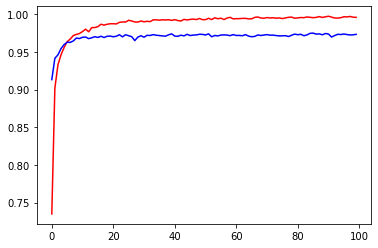

In [8]:
import matplotlib.pyplot as plt

print(history.history.keys())
plt.plot(history.history['sparse_categorical_accuracy'], color='r')
plt.plot(history.history['val_sparse_categorical_accuracy'], color='b')
plt.show()